In [1]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image 
from os.path import isfile, join 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping


In [2]:
# import os
# from PIL import Image
# import numpy as np

# # Assuming cur_path is the path to the root directory containing the 'Train' folder
# cur_path = "E:/Traffic_Sign_Classification_System_main/signal_dataset"  # Replace with the actual path to your data
# classes = 43  # Assuming there are 10 classes (modify if different)

# data = []
# labels = []

# for i in range(classes):
#     path = os.path.join(cur_path, 'Train', str(i))

#     # Check if the directory exists before listing files
#     if os.path.isdir(path):
#         images = os.listdir(path)
#         for a in images:
#             try:
#                 image = Image.open(os.path.join(path, a))
#                 image = image.resize((40, 40))
#                 image = np.array(image)
#                 data.append(image)
#                 labels.append(i)
#             except Exception as e:
#                 print(f"Error processing image {a}: {e}")
#     else:
#         print(f"Directory not found: {path}")

# # Now you have your data and labels lists
# print("Data preparation complete!")

In [3]:
import os
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming cur_path is the path to the root directory containing the 'Train' folder
cur_path = "E:/Traffic_Sign_Classification_System_main/signal_dataset"  # Replace with the actual path to your data
classes = 43  # Assuming there are 43 classes (modify if different)

data = []
labels = []

# Data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images by 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift images vertically by up to 10% of the height
    shear_range=0.1,  # Shear intensity (shear angle in radians)
    zoom_range=0.1,  # Zoom range [0.9, 1.1]
    horizontal_flip=True,  # Randomly flip images horizontally (disabled for traffic signs)
    vertical_flip=True,  # Randomly flip images vertically (disabled for traffic signs)
    fill_mode='nearest'  # Fill mode for points outside the input boundaries
)

for i in range(classes):
    path = os.path.join(cur_path, 'Train', str(i))

    # Check if the directory exists before listing files
    if os.path.isdir(path):
        images = os.listdir(path)
        for a in images:
            try:
                image = Image.open(os.path.join(path, a))
                image = image.resize((40, 40))
                image = np.array(image)
                data.append(image)
                labels.append(i)

                # Apply data augmentation
                image = np.expand_dims(image, axis=0)
                for _ in range(4):  # Augment each image 4 times
                    augmented_image = datagen.flow(image, batch_size=1).next()[0]
                    data.append(augmented_image)
                    labels.append(i)

            except Exception as e:
                print(f"Error processing image {a}: {e}")
    else:
        print(f"Directory not found: {path}")

# Now you have your augmented data and labels lists
print("Data augmentation complete!")


Data augmentation complete!


In [4]:
data = np.array(data)
labels = np.array(labels)

In [5]:
np.save("E:/Traffic_Sign_Classification_System_main/signal_dataset/Train",data)
np.save("E:/Traffic_Sign_Classification_System_main/signal_dataset/Train.csv",labels)

In [6]:
data = np.load("E:\Traffic_Sign_Classification_System_main\signal_dataset\Train.npy")
labels = np.load("E:\Traffic_Sign_Classification_System_main\signal_dataset\Train.csv.npy")

In [7]:
print('Shape of Image Data: ' + str(data.shape))
print('Shape of Labels Data: ' + str(labels.shape))

Shape of Image Data: (196045, 40, 40, 3)
Shape of Labels Data: (196045,)


In [8]:
x_train,x_test,y_train,y_test = train_test_split(data, labels, test_size = 0.2, random_state = 0)
print('20% Data is used as testing data')
print('Train Test Split Complete!!!')

20% Data is used as testing data
Train Test Split Complete!!!


In [9]:
print('Training sample sape for Image Data: ' + str(x_train.shape))
print('Testing sample sape for Image Data: ' + str(x_test.shape))
print('Training sample sape for Labels Data: ' + str(y_train.shape))
print('Testing sample sape for Labels Data: ' + str(y_test.shape))

Training sample sape for Image Data: (156836, 40, 40, 3)
Testing sample sape for Image Data: (39209, 40, 40, 3)
Training sample sape for Labels Data: (156836,)
Testing sample sape for Labels Data: (39209,)


In [12]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

print('Model Succesfully Developed !!!!')

Model Succesfully Developed !!!!


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size = 32, epochs = 20 , validation_data = (x_test,y_test))

Epoch 1/20
4902/4902 [==============================] - 302s 61ms/step - loss: 1.8762 - accuracy: 0.4319 - val_loss: 0.9932 - val_accuracy: 0.6693
Epoch 2/20
4902/4902 [==============================] - 304s 62ms/step - loss: 1.0875 - accuracy: 0.6474 - val_loss: 0.6082 - val_accuracy: 0.8017
Epoch 3/20
4902/4902 [==============================] - 306s 62ms/step - loss: 0.8643 - accuracy: 0.7235 - val_loss: 0.4698 - val_accuracy: 0.8412
Epoch 4/20
4902/4902 [==============================] - 304s 62ms/step - loss: 0.7580 - accuracy: 0.7604 - val_loss: 0.4219 - val_accuracy: 0.8621
Epoch 5/20
4902/4902 [==============================] - 317s 65ms/step - loss: 0.7121 - accuracy: 0.7763 - val_loss: 0.3348 - val_accuracy: 0.8899
Epoch 6/20
4902/4902 [==============================] - 328s 67ms/step - loss: 0.7391 - accuracy: 0.7719 - val_loss: 0.3088 - val_accuracy: 0.8983
Epoch 7/20
4902/4902 [==============================] - 345s 70ms/step - loss: 0.6811 - accuracy: 0.7908 - val_loss: 0

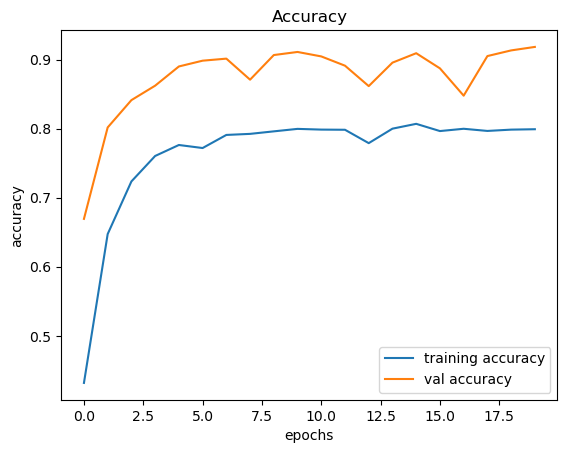

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history ['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


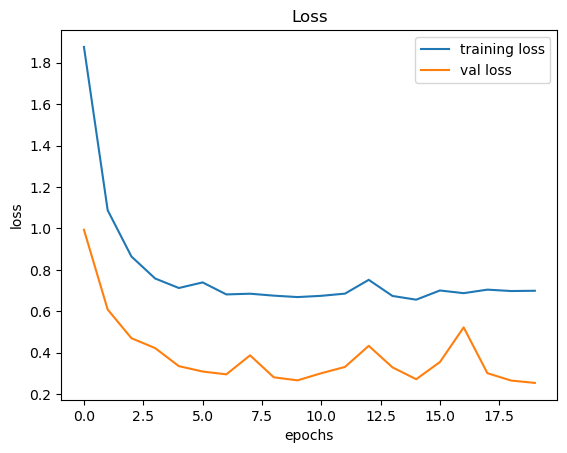

In [ ]:
plt.plot (history.history['loss'], label = 'training loss')
plt.plot(history.history ['val_loss'], label = 'val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()